# 가우시안 분포(Gaussian Distribution)
정규 분포(Normal Distribution)

$ P(x)=\frac { 1 }{ { \sigma \sqrt { 2\pi  }  } } e^{ { { \frac { -\left( { x-\mu  } \right) ^{ 2 } }{ { { 2\sigma ^{ 2 } } } }  } } } $

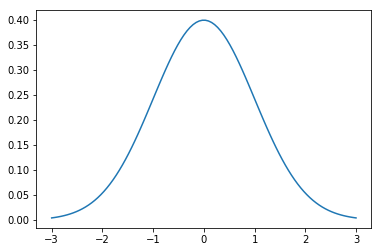

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0                          # mean
variance = 1
sigma = math.sqrt(variance)     # stddev
plt_z = np.linspace(-3, 3, 100) # z-score

# Python: 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
plt.plot(plt_z, mlab.normpdf(plt_z, mu, sigma))

# Gaussian Distribution(Normal Distribution)
plt.show()

In [2]:
from scipy.stats import norm

# 표준 정규 분포(Standard Normal Distribution)를 이용한 확률 예측 차트 표현
def print_prob_chart(x):
    # plt_x 설정(range 1 ~ max)
    plt_x = np.arange(1, x.max(), 1)
    y = []
    for i in np.nditer(plt_x):
        y.append(np.sum(x > i))
    # actual ratio
    y = np.array(y) / x.size

    # mean, stddev, z-score    
    mu = np.mean(x)
    sigma = np.std(x)
    z = (plt_x - mu) / sigma
    
    plt.fill_between(plt_x, y, facecolor='blue', alpha=0.2)
    plt.plot(plt_x, 1 - norm(0, 1).cdf(z), color='red')
    plt.plot(plt_x, norm(0, 1).pdf(z), color='blue')
    
    plt.legend(['1 - cdf', 'pdf'])
    plt.show()

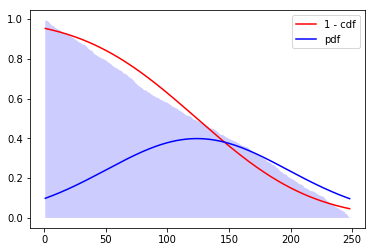

In [3]:
# default: 1000개(range 0 ~ 250)
# 랜덤하게 생성하나 많이 생성하여 고르게 분포됨
x = np.random.randint(0,250,1000)
print_prob_chart(x)

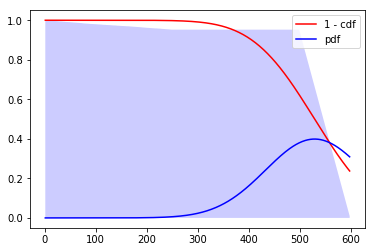

In [4]:
# range 500 ~ 600 사이 outlier 2000개 추가
print_prob_chart(np.append(x, np.repeat(np.arange(500,600, 1), 200)))

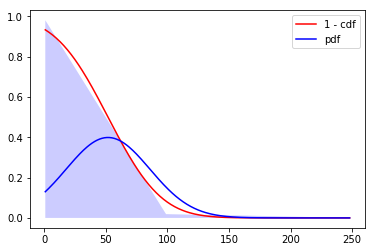

In [5]:
# range 0 ~ 100 사이에 3000개 추가
print_prob_chart(np.append(x, np.repeat(np.arange(0,100, 1), 300)))

표준 정규 분포를 이용한 `1 - cdf`의 값은 실제 데이타 분포와 매우 유사함을 확인할 수 있다.